In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import sklearn.metrics

Load Data from Seaborn

In [63]:
penguins = sns.load_dataset('penguins')

In [64]:
penguins = penguins.dropna()

In [65]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [66]:
# Pick 2 species
penguins_filtered = penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

Pre-process

In [67]:
le=LabelEncoder()
penguins_filtered['species']=le.fit_transform(penguins_filtered['species'])

penguins_filtered = pd.get_dummies(penguins_filtered, columns=['island', 'sex'], drop_first=True)

<ipython-input-67-5e4c30a56fe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_filtered['species']=le.fit_transform(penguins_filtered['species'])


In [68]:
X = penguins_filtered.drop(columns=['species'], axis=1)
y = penguins_filtered['species']

Train-test Split

In [69]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts()

,count
species,
0,113
1,99


Naive Bayes

In [70]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, nb_model.predict(X_test))

Logistic Regression

In [71]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(X_test))

**1. Accuracy Comparison:**

In [72]:
print("Naive Bayes Training Accuracy:")
print(nb_train_acc)
print("Naive Bayes Test Accuracy:")
print(nb_test_acc)
print("Logistic Regression Training Accuracy:")
print(lr_train_acc)
print("Logistic Regression Test Accuracy:")
print(lr_test_acc)

Naive Bayes Training Accuracy:
1.0
Naive Bayes Test Accuracy:
1.0
Logistic Regression Training Accuracy:
1.0
Logistic Regression Test Accuracy:
1.0


The accuracy of both models in the penguin training data set and the test data set is 100%. It is difficult for me to distinguish which model is better based on the accuracy alone. It is possible that both models are overfitting here. Or the penguin data set containing only two species cannot allow the two models to fully perform.

**2. AUC (Area Under the ROC Curve) Comparison:**

In [73]:
nb_train_proba = nb_model.predict_proba(X_train)[:, 1]
nb_test_proba = nb_model.predict_proba(X_test)[:, 1]

lr_train_proba = lr_model.predict_proba(X_train)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]

nb_train_auc = roc_auc_score(y_train, nb_train_proba)
nb_test_auc = roc_auc_score(y_test, nb_test_proba)

lr_train_auc = roc_auc_score(y_train, lr_train_proba)
lr_test_auc = roc_auc_score(y_test, lr_test_proba)

In [74]:
print("Naive Bayes Training AUC:")
print(nb_train_auc)
print("Naive Bayes Test AUC:")
print(nb_test_auc)
print("Logistic Regression Training AUC:")
print(lr_train_auc)
print("Logistic Regression Test AUC:")
print(lr_test_auc)

Naive Bayes Training AUC:
1.0
Naive Bayes Test AUC:
1.0
Logistic Regression Training AUC:
1.0
Logistic Regression Test AUC:
1.0


The AUC of both models reached 1 in both the training set and the test set, indicating that both models can effectively discriminate between the two penguin species. It may be that the dataset is too small, resulting in the inability to give full play to the model performance.

**3. Lift and Gain Charts:**

In [75]:
pip install mljar-scikit-plot

In [ ]:
import scikitplot as skplt

<Figure size 1200x600 with 0 Axes>

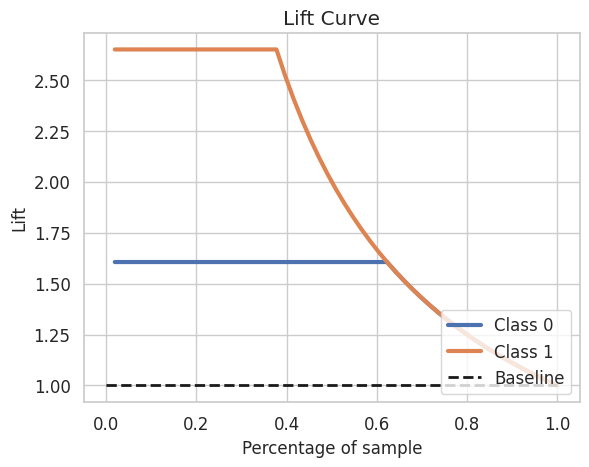

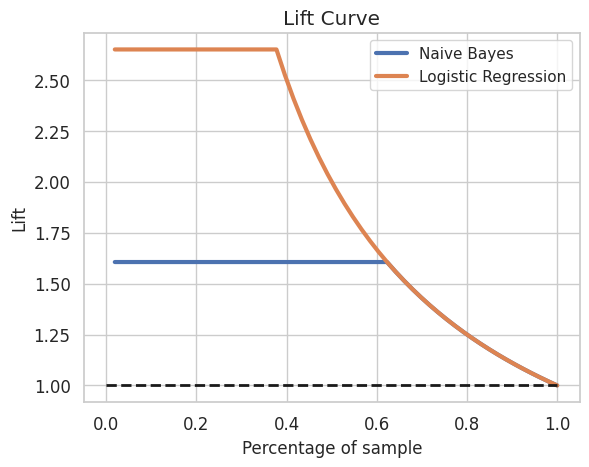

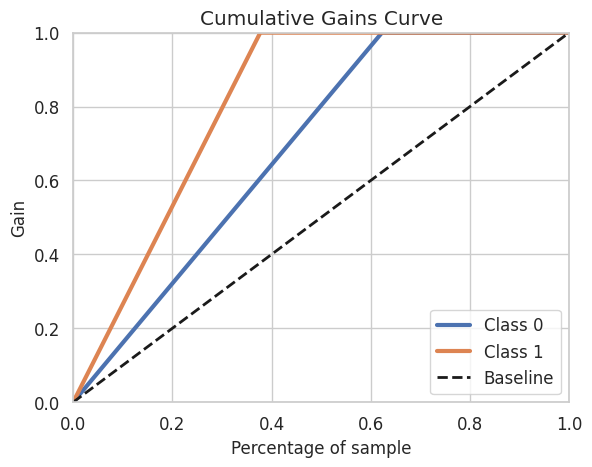

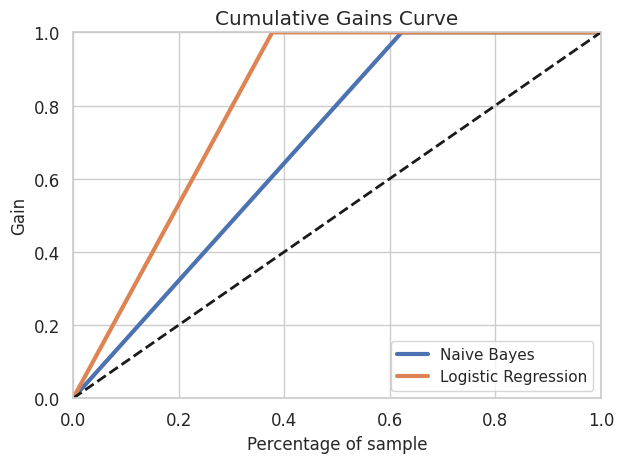

In [76]:
nb_prob = nb_model.predict_proba(X_test)
lr_prob = lr_model.predict_proba(X_test)

plt.figure(figsize=(12, 6))

skplt.metrics.plot_lift_curve(y_test, nb_prob)
skplt.metrics.plot_lift_curve(y_test, lr_prob)
plt.legend(["Naive Bayes", "Logistic Regression"])

skplt.metrics.plot_cumulative_gain(y_test, nb_prob)
skplt.metrics.plot_cumulative_gain(y_test, lr_prob)
plt.legend(["Naive Bayes", "Logistic Regression"])

plt.tight_layout()
plt.show()

On the Lift and Gain chart, the two models are slightly different. Logistic Regression has higher Lift and gain values ​​at earlier deciles. It seems LR is better model on this data set.

**4. Model Performance Comparison:**

In general, the Logistic Regression model performs better on the penguin dataset containing two species. The performance difference between the two models is mainly reflected in Lift and gain.
Since the two models have the same AUC, and the Logistic Regression model has higher Lift and gain values ​​​​at earlier deciles. This means that the LR model has faster efficiency at the same accuracy, so I think the Logistic Regression model performs better in classification.

**5. Performance on a Complex Dataset:**

Data loading and pre-processing

In [77]:
# Load MNIST dataset from OpenML
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Naive Bayes

In [79]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, nb_model.predict(X_test))

Logistic Regression

In [80]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(X_test))

Accuracy

In [81]:
nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, nb_model.predict(X_test))

lr_train_acc = accuracy_score(y_train, lr_model.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr_model.predict(X_test))

In [82]:
print("Naive Bayes Training Accuracy:")
print(nb_train_acc)
print("Naive Bayes Test Accuracy:")
print(nb_test_acc)
print("Logistic Regression Training Accuracy:")
print(lr_train_acc)
print("Logistic Regression Test Accuracy:")
print(lr_test_acc)

Naive Bayes Training Accuracy:
0.5266607142857143
Naive Bayes Test Accuracy:
0.5257857142857143
Logistic Regression Training Accuracy:
0.9450714285714286
Logistic Regression Test Accuracy:
0.9155


AUC

In [83]:
nb_train_proba = nb_model.predict_proba(X_train)[:, 1]
nb_test_proba = nb_model.predict_proba(X_test)[:, 1]

lr_train_proba = lr_model.predict_proba(X_train)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]

nb_train_auc = roc_auc_score(y_train, nb_model.predict_proba(X_train), multi_class='ovr')
nb_test_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test), multi_class='ovr')

lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train), multi_class='ovr')
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test), multi_class='ovr')

In [84]:
print("Naive Bayes Training AUC:")
print(nb_train_auc)
print("Naive Bayes Test AUC:")
print(nb_test_auc)
print("Logistic Regression Training AUC:")
print(lr_train_auc)
print("Logistic Regression Test AUC:")
print(lr_test_auc)

Naive Bayes Training AUC:
0.9262632268299639
Naive Bayes Test AUC:
0.9253354109323377
Logistic Regression Training AUC:
0.9967767857154348
Logistic Regression Test AUC:
0.9905354400530504


On more complex datasets like MNIST, the two models begin to differ. Logistic Regression is significantly better than Naive Bayes in terms of accuracy, both on the training dataset and the test dataset. In terms of AUC, although the two are very close, Logistic Regression still has a certain advantage.
When the dataset complexity is low, I think the difference between the models is very small and almost negligible, but when the model complexity is high, the advantage of the LR model becomes very large.